**Women's Clothing E-Commerce Reviews **

![Image](https://moldkansascity.com/wp-content/uploads/2016/03/customer-reviews.png)

Welcome to my 4th kernel on Kaggle. Through this notebook, I want to explore and analyze the reviews part. All reviews are valuable, and a mix of positive and negative reviews helps to improve consumer trust in the opinions they read. Reviews are certainly an important factor to increase conversions. 
[Here](https://econsultancy.com/blog/9366-ecommerce-consumer-reviews-why-you-need-them-and-how-to-use-them) is the good article on 'E-commerce consumer reviews: why you need them and how to use them'

In this Notebook, I explored the below things:-

1. The age group of female who wrote the most, least, and very few reviews
2. The age group bought what kind of product (Department names) 
3. The age group bought what kind of product (Class names) 
4. The Department has what number or percentage of Class names
5. Which Division name has what number of Department names 
6. Which Division name has what number of Class name
7. Count the frequency of words in Review Text column
8. Wordcloud of the Review Text column
9. Review Text column - How many are positive, negative, and neutral reviews based on the sentiment and polarity value.
10. Wordcloud of the positive Review Text column
11. Wordcloud of the negative Review Text column
12. Used Multinomial Naive Bayes Algorithm to predict which product has 5 rating and which has 1 rating?
13. Used Multinomial Naive Bayes Algorithm to predict which product is recommended and which is not?

**Keys- Multinomial Naive Bayes, WordCloud, TextBlob, Word Frequency, StopWords, Sentiments, NLP, NLTK**


*Required Libraries:-*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

/Users/mengningshang/Desktop/Dev_Env/carAI/CarND-Alexnet-Feature-Extraction/wcd-ml-b2/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


*Importing file into dataframe*

In [4]:
df_rough=pd.read_csv("./Womens Clothing E-Commerce Reviews.csv",index_col=False)
column_contain=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']

In [5]:
df=pd.DataFrame(data=df_rough,columns=column_contain)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


*This dataset has 23486 entries and 9 columns. Some of the entries are missing like Title, Division Name, Department Name, and Class Name. *

In [6]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


*Is there any correlation between user's rating and reviews length ?*

In [8]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

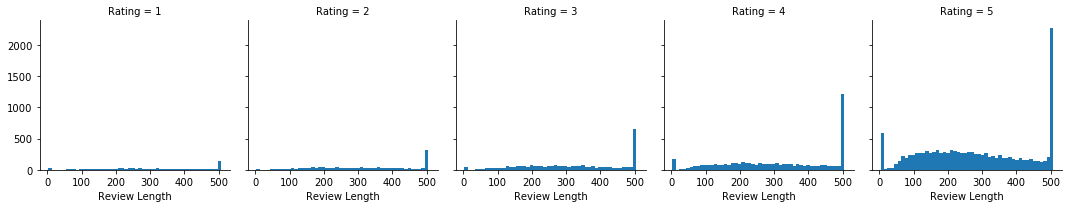

In [9]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

*From the above chart, we can say that the users gave 5 rating oftenly. Infact, there are less no of users who gave rating 1 and 2.*

/Users/mengningshang/Desktop/Dev_Env/carAI/CarND-Alexnet-Feature-Extraction/wcd-ml-b2/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


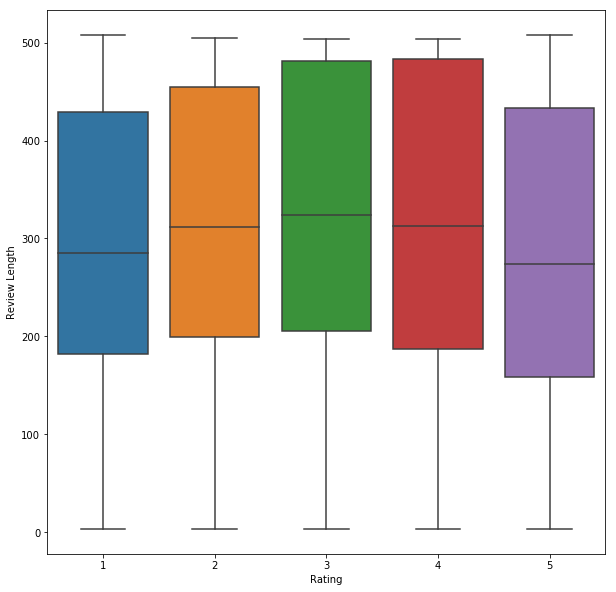

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=df)

*From the above boxplot, we can conclude that the rating 3 and 4 have more lenth in review. *

In [11]:
rating = df.groupby('Rating').mean()
rating.corr()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,-0.977686,-0.303355,0.378828,0.975037
Age,-0.977686,1.000000,0.115681,-0.194958,-0.930949
Recommended IND,-0.303355,0.115681,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.378828,-0.194958,-0.987748,1.000000,0.384312
Review Length,0.975037,-0.930949,-0.307808,0.384312,1.000000


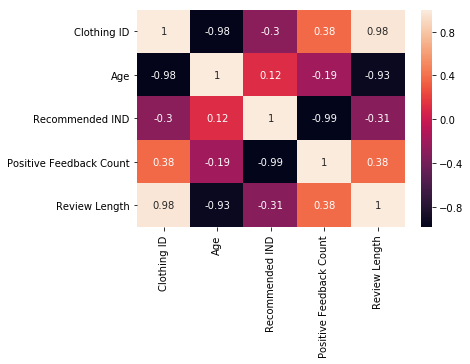

In [12]:
sns.heatmap(data=rating.corr(), annot=True)

The above correlation map shows that there is not much correlation among the column. The columns like review length and positive feedback count are slightly correlated. And, the number 0.93 in negative inidicates that it is nowhere correlated with Review Length. As the Age grows the length of review decreases.

In [13]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


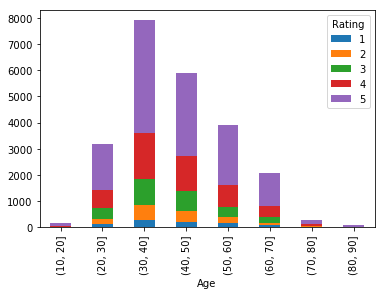

In [14]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

*From the above barplot, we can say that the age group 10-20 gave less rating. It is obvious. In this age group teenagers generally don't care about online shopping and reviews. The age group 30-40 gave more 5 rating as compared to all the other age groups. In fact, this is the age group who gave most of the reviews and ratings. And similarly, the age group above 70 did not care about the online shopping stuff. *

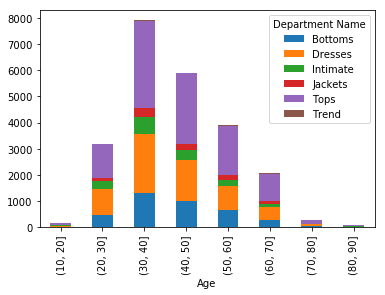

In [15]:
plt.figure(figsize=(15,15))
df.groupby(['Department Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

*In the above barplot, I want to concentrate on the department and the age group. The females from 20-70 age were more active and bought the stuff online. From the above barplot, we can conclude that the females were more focussed on Tops and Dressess department. And, somewhat focussed on Bottoms too but not that much. They were less concentrated on Trend department. *

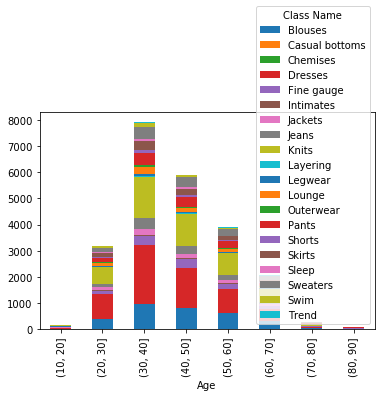

In [16]:
plt.figure(figsize=(15,15))
df.groupby(['Class Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)


/Users/mengningshang/Desktop/Dev_Env/carAI/CarND-Alexnet-Feature-Extraction/wcd-ml-b2/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


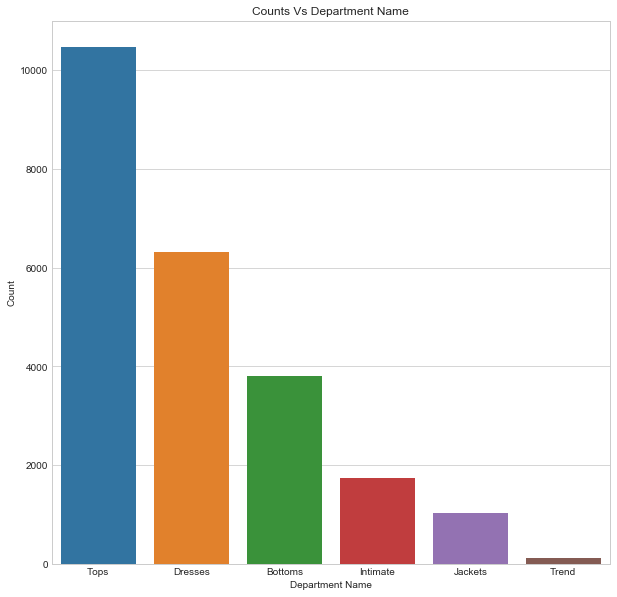

In [17]:
z=df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")

*The above barplot shows that there are maximum entries for Top which is around 10500. And, then the Dresses department is having around 6000 entries*

/Users/mengningshang/Desktop/Dev_Env/carAI/CarND-Alexnet-Feature-Extraction/wcd-ml-b2/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


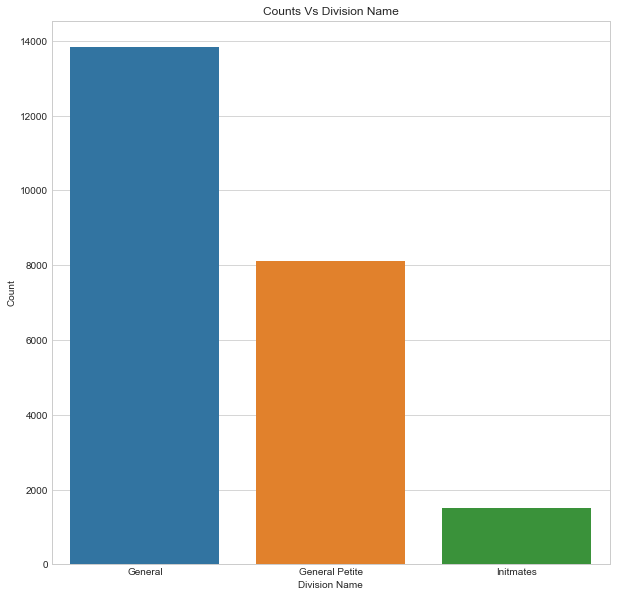

In [18]:
w=df.groupby(by=['Division Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=w['Division Name'],y=w['Class Name'], data=w)
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Counts Vs Division Name")

*In our dataset, there are 3 divisions which are General, General Petite, and Intimates. The General Division producs were more sold out as compared to General Petite and Intimates. There were around 14K producs were sold in General division, 8K products in General Petite division and around 1600 products were sold in Initmates division.  *

In [19]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mengningshang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[('dress', 10567), ('love', 8951), ('size', 8774), ('top', 7418)]


/Users/mengningshang/Desktop/Dev_Env/carAI/CarND-Alexnet-Feature-Extraction/wcd-ml-b2/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


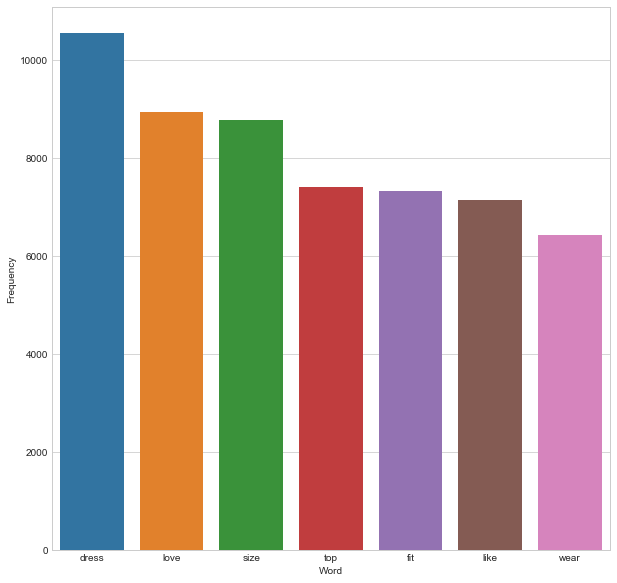

In [20]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
print(word_dist.most_common(4))
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

*The above barplot calculates the frequency of the word in Review Text column. The word Dress appeared more in the text. Next to this, the word Love comes second which is an indicator of positive review. *

In [21]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

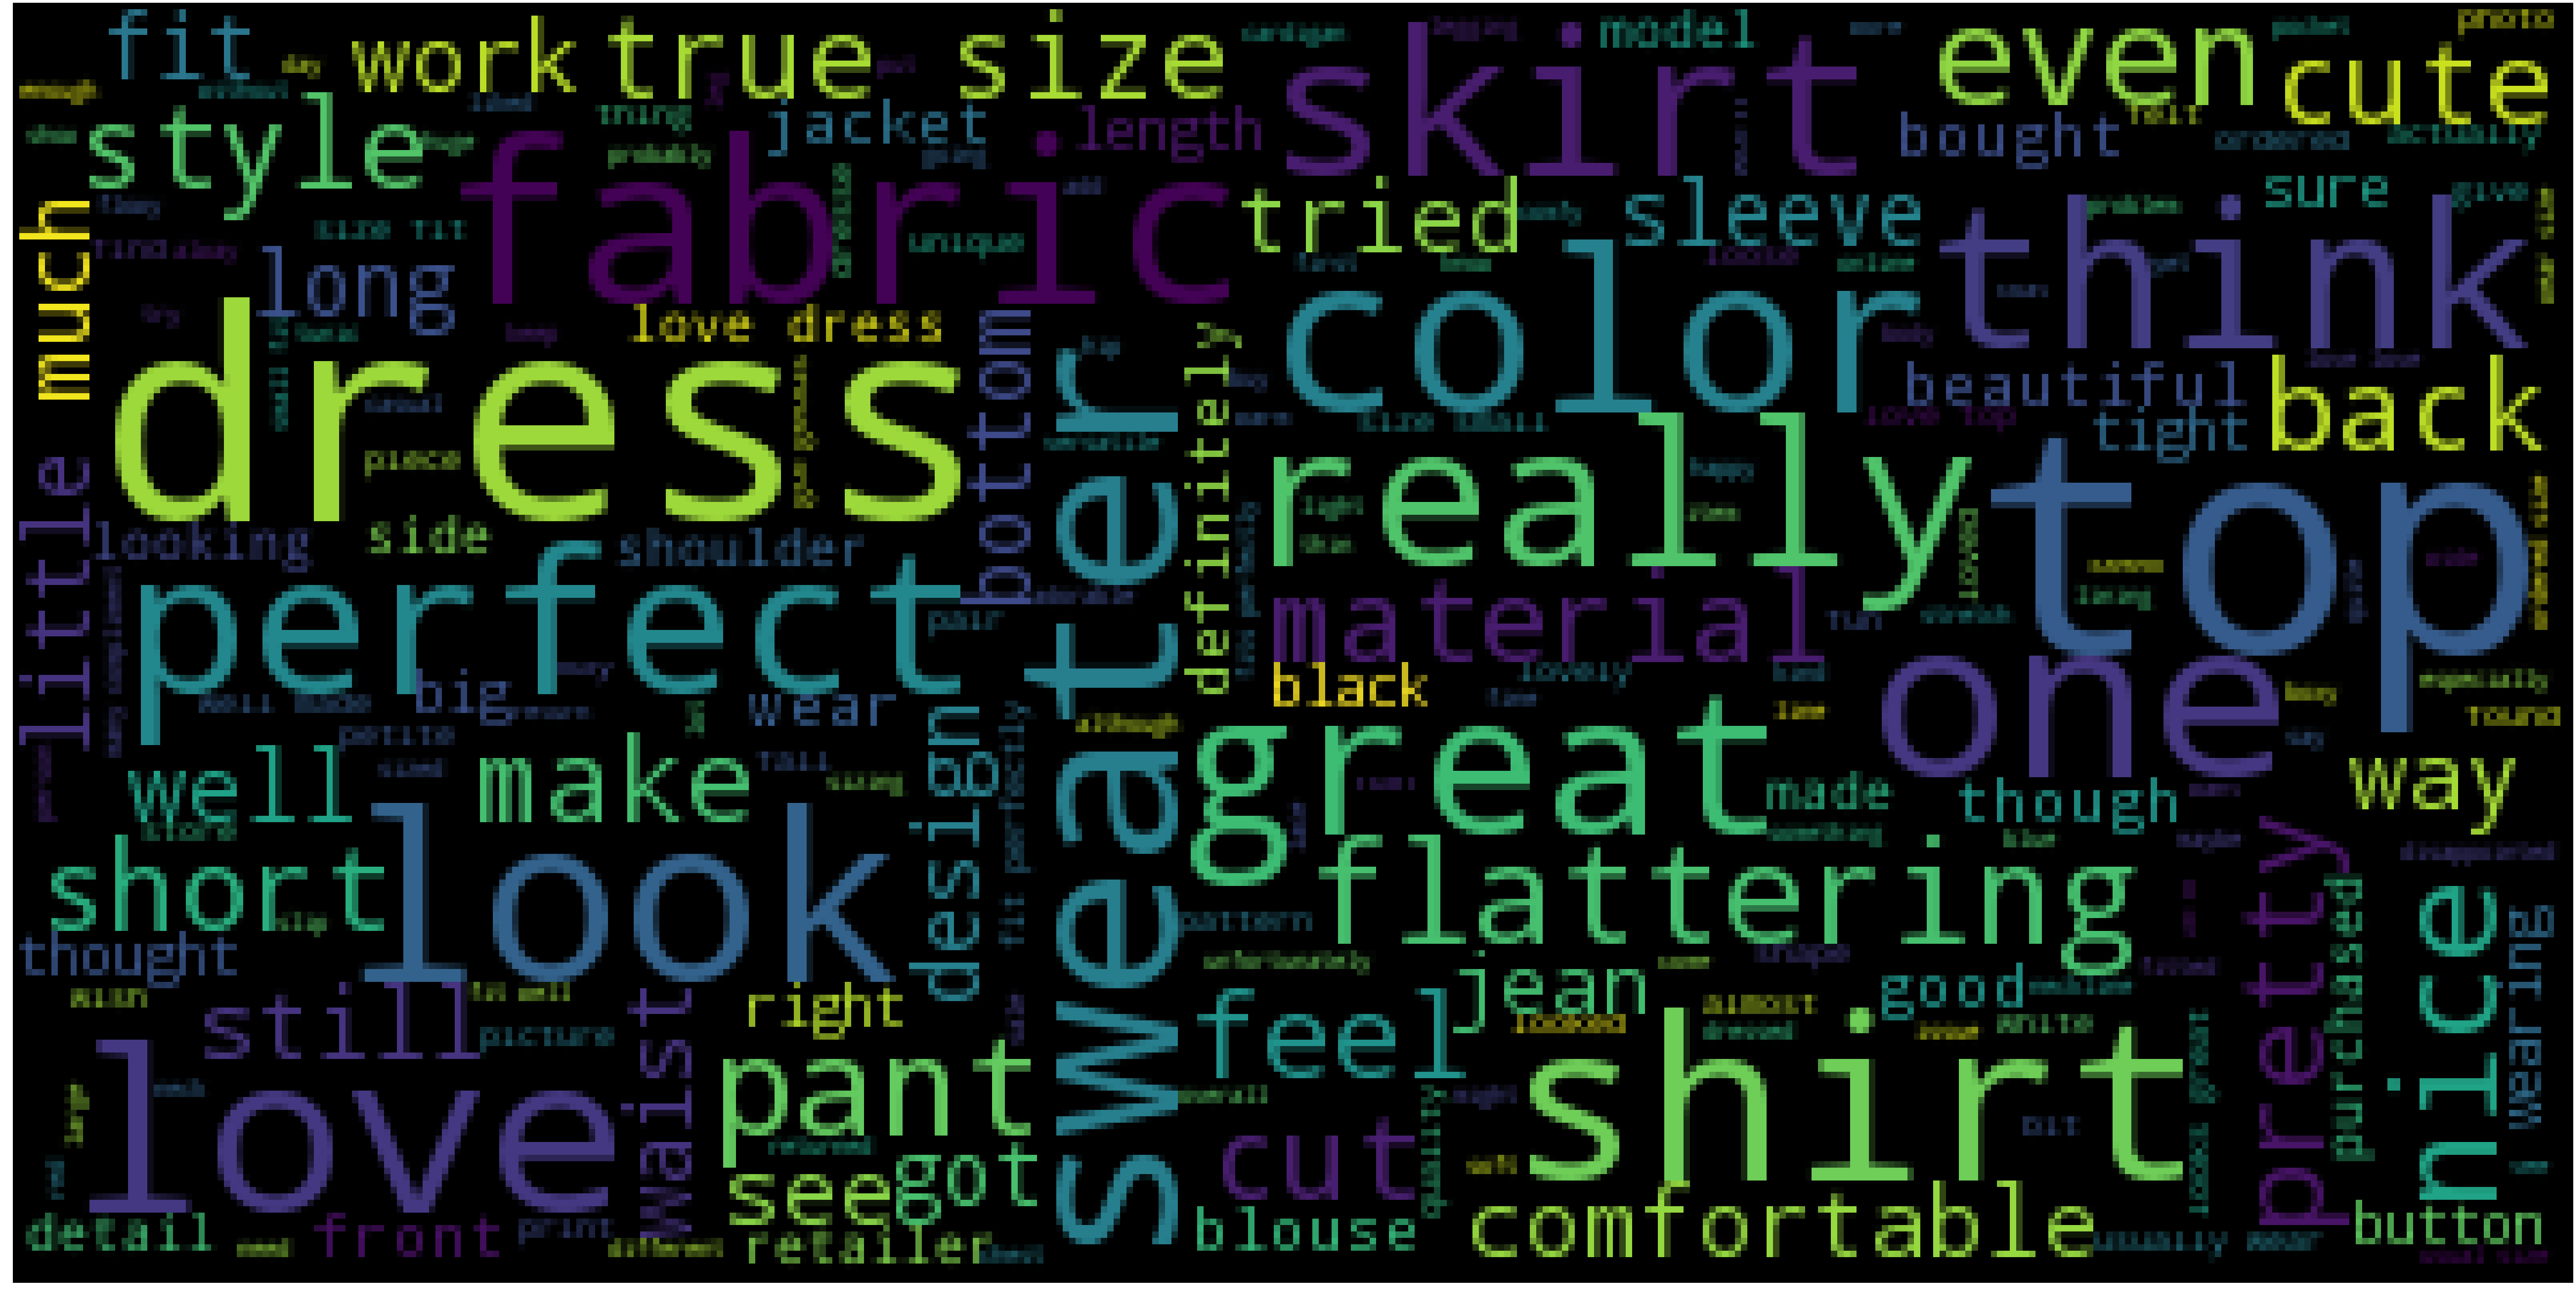

In [22]:
wc(cleaned_data_title,'black','Most Used Words')

*The above wordcloud is for the most oftenly used words in the Review Text column*

/Users/mengningshang/Desktop/Dev_Env/carAI/CarND-Alexnet-Feature-Extraction/wcd-ml-b2/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


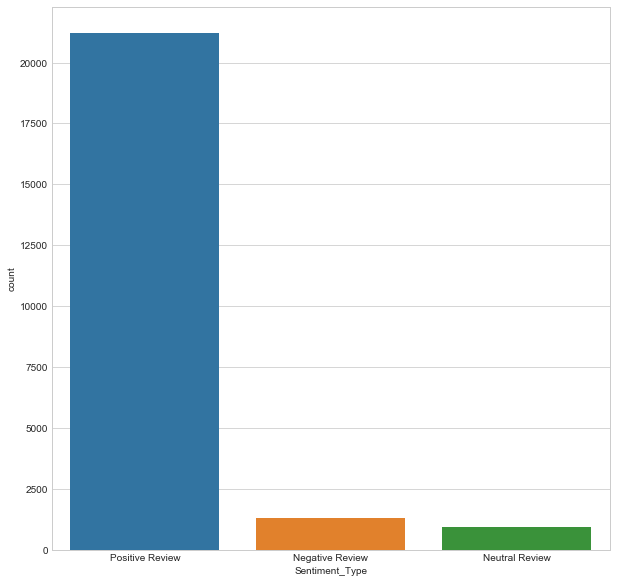

In [23]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)


*According to the above graph, there are more positive reviews but again it depends on the polarity value. I condsidered sentiment value > 0 is Positive Review..*

In [24]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

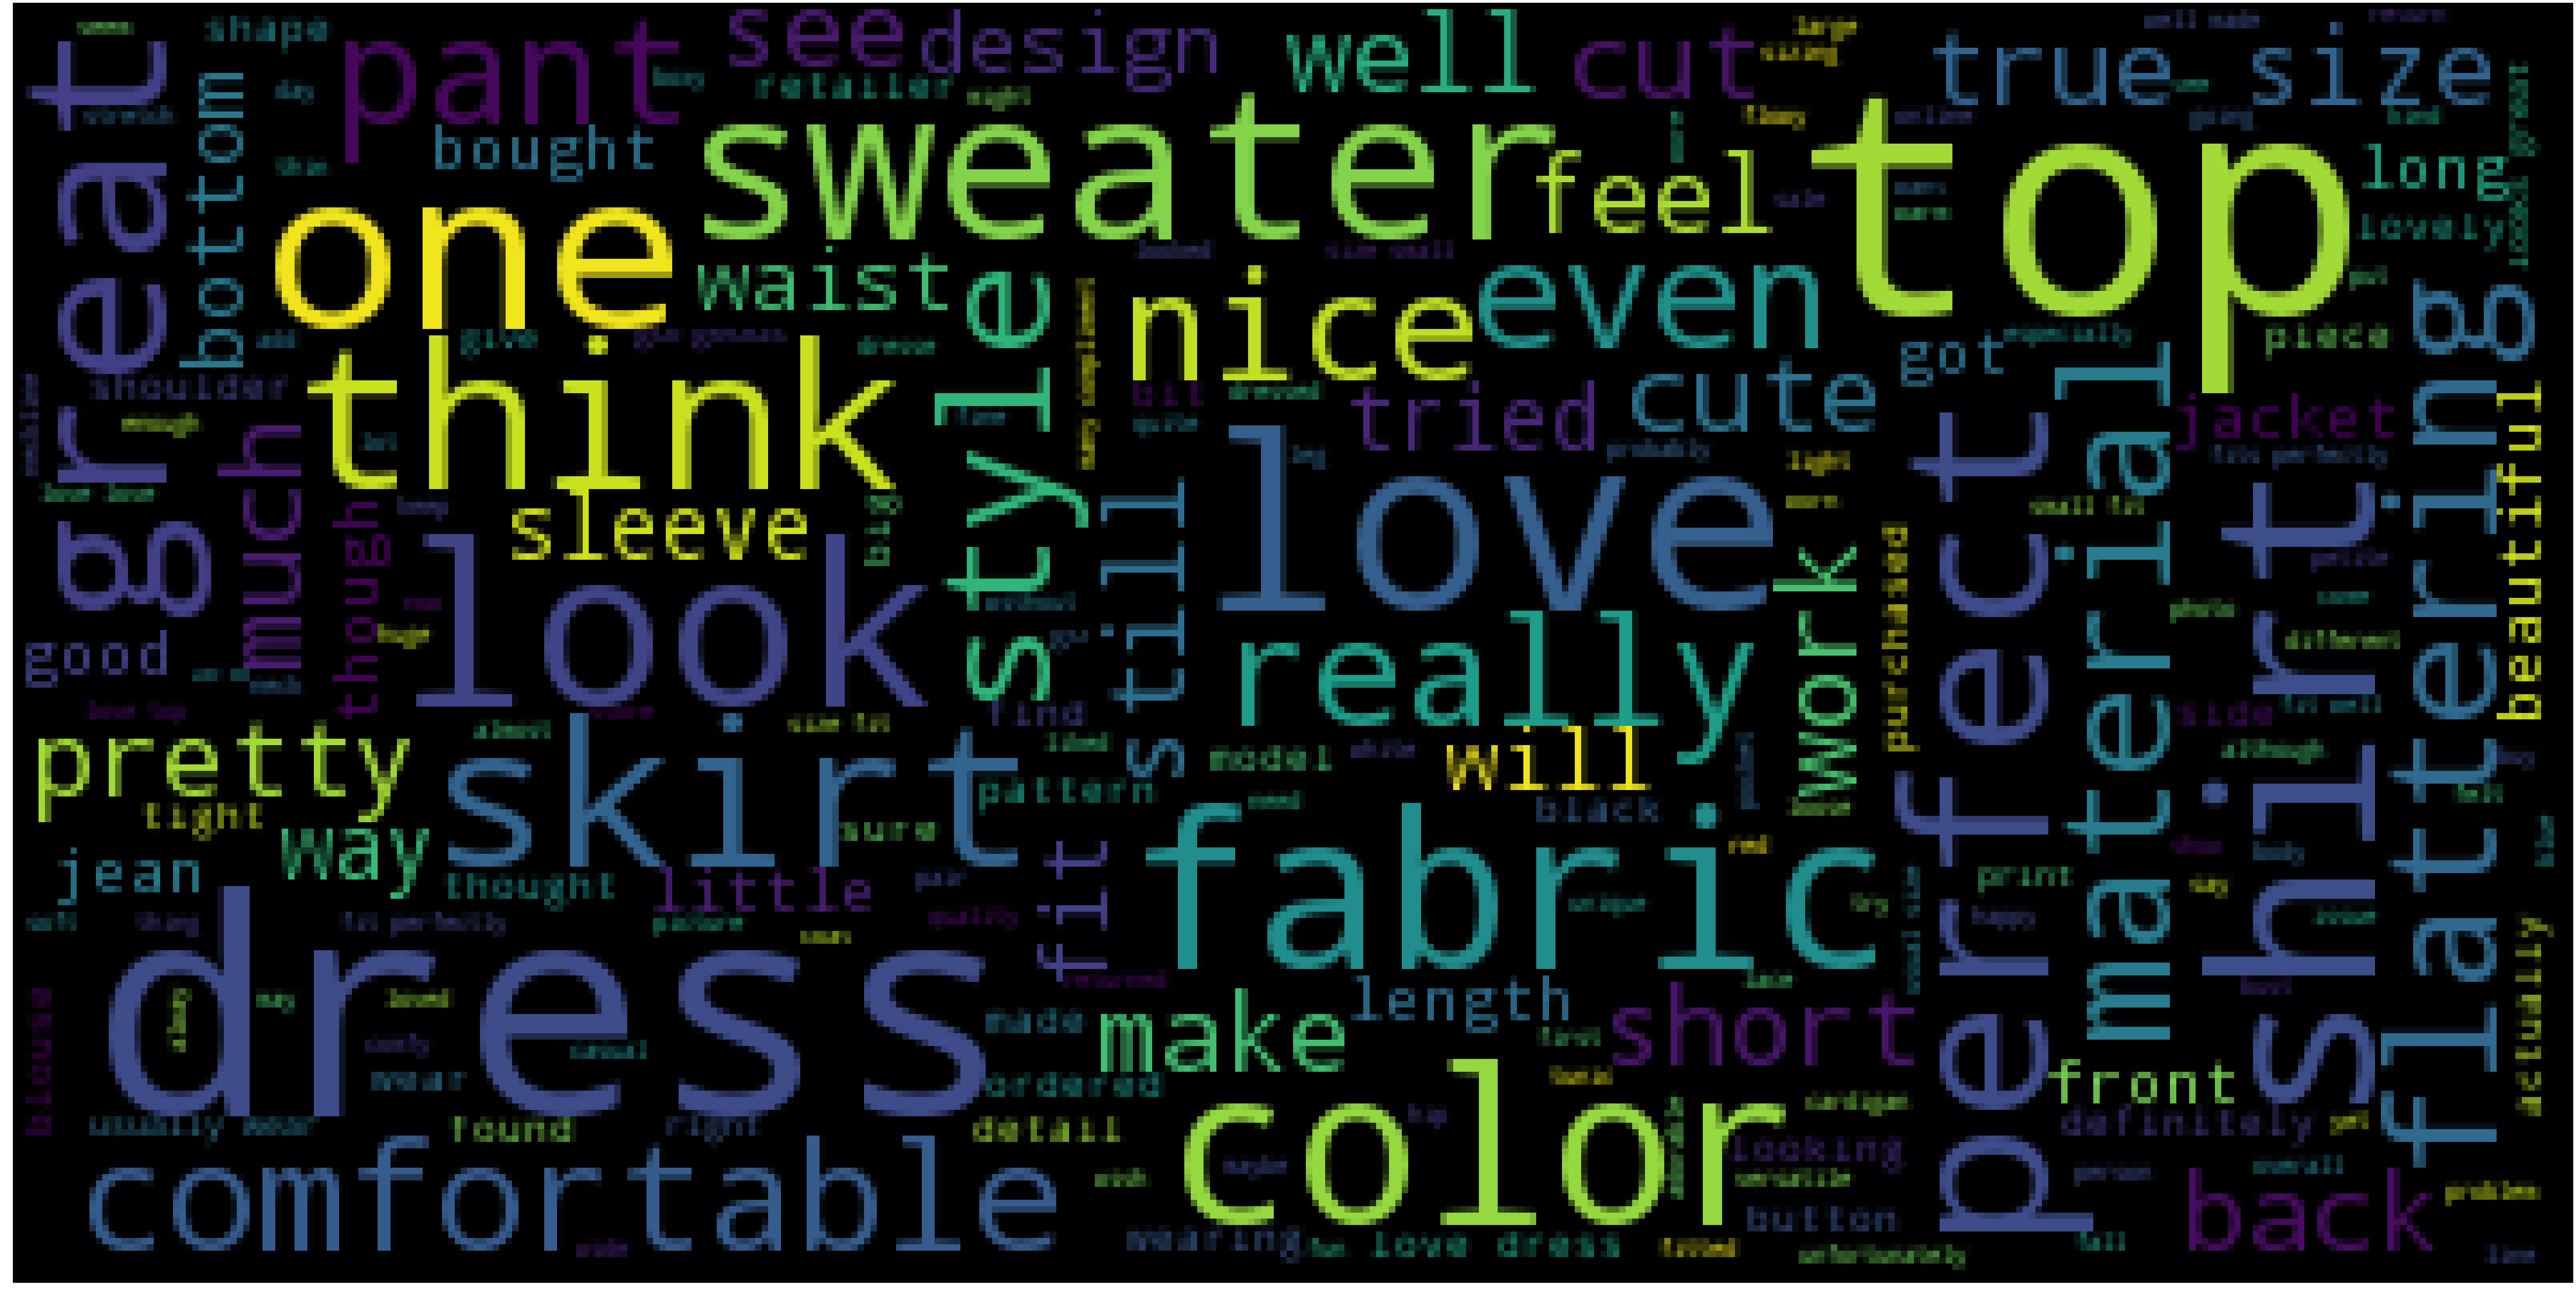

In [25]:
wc(positive_reviews['Review'],'black','Most Used Words')

 *The above wordcloud only for the Positive reviews.*

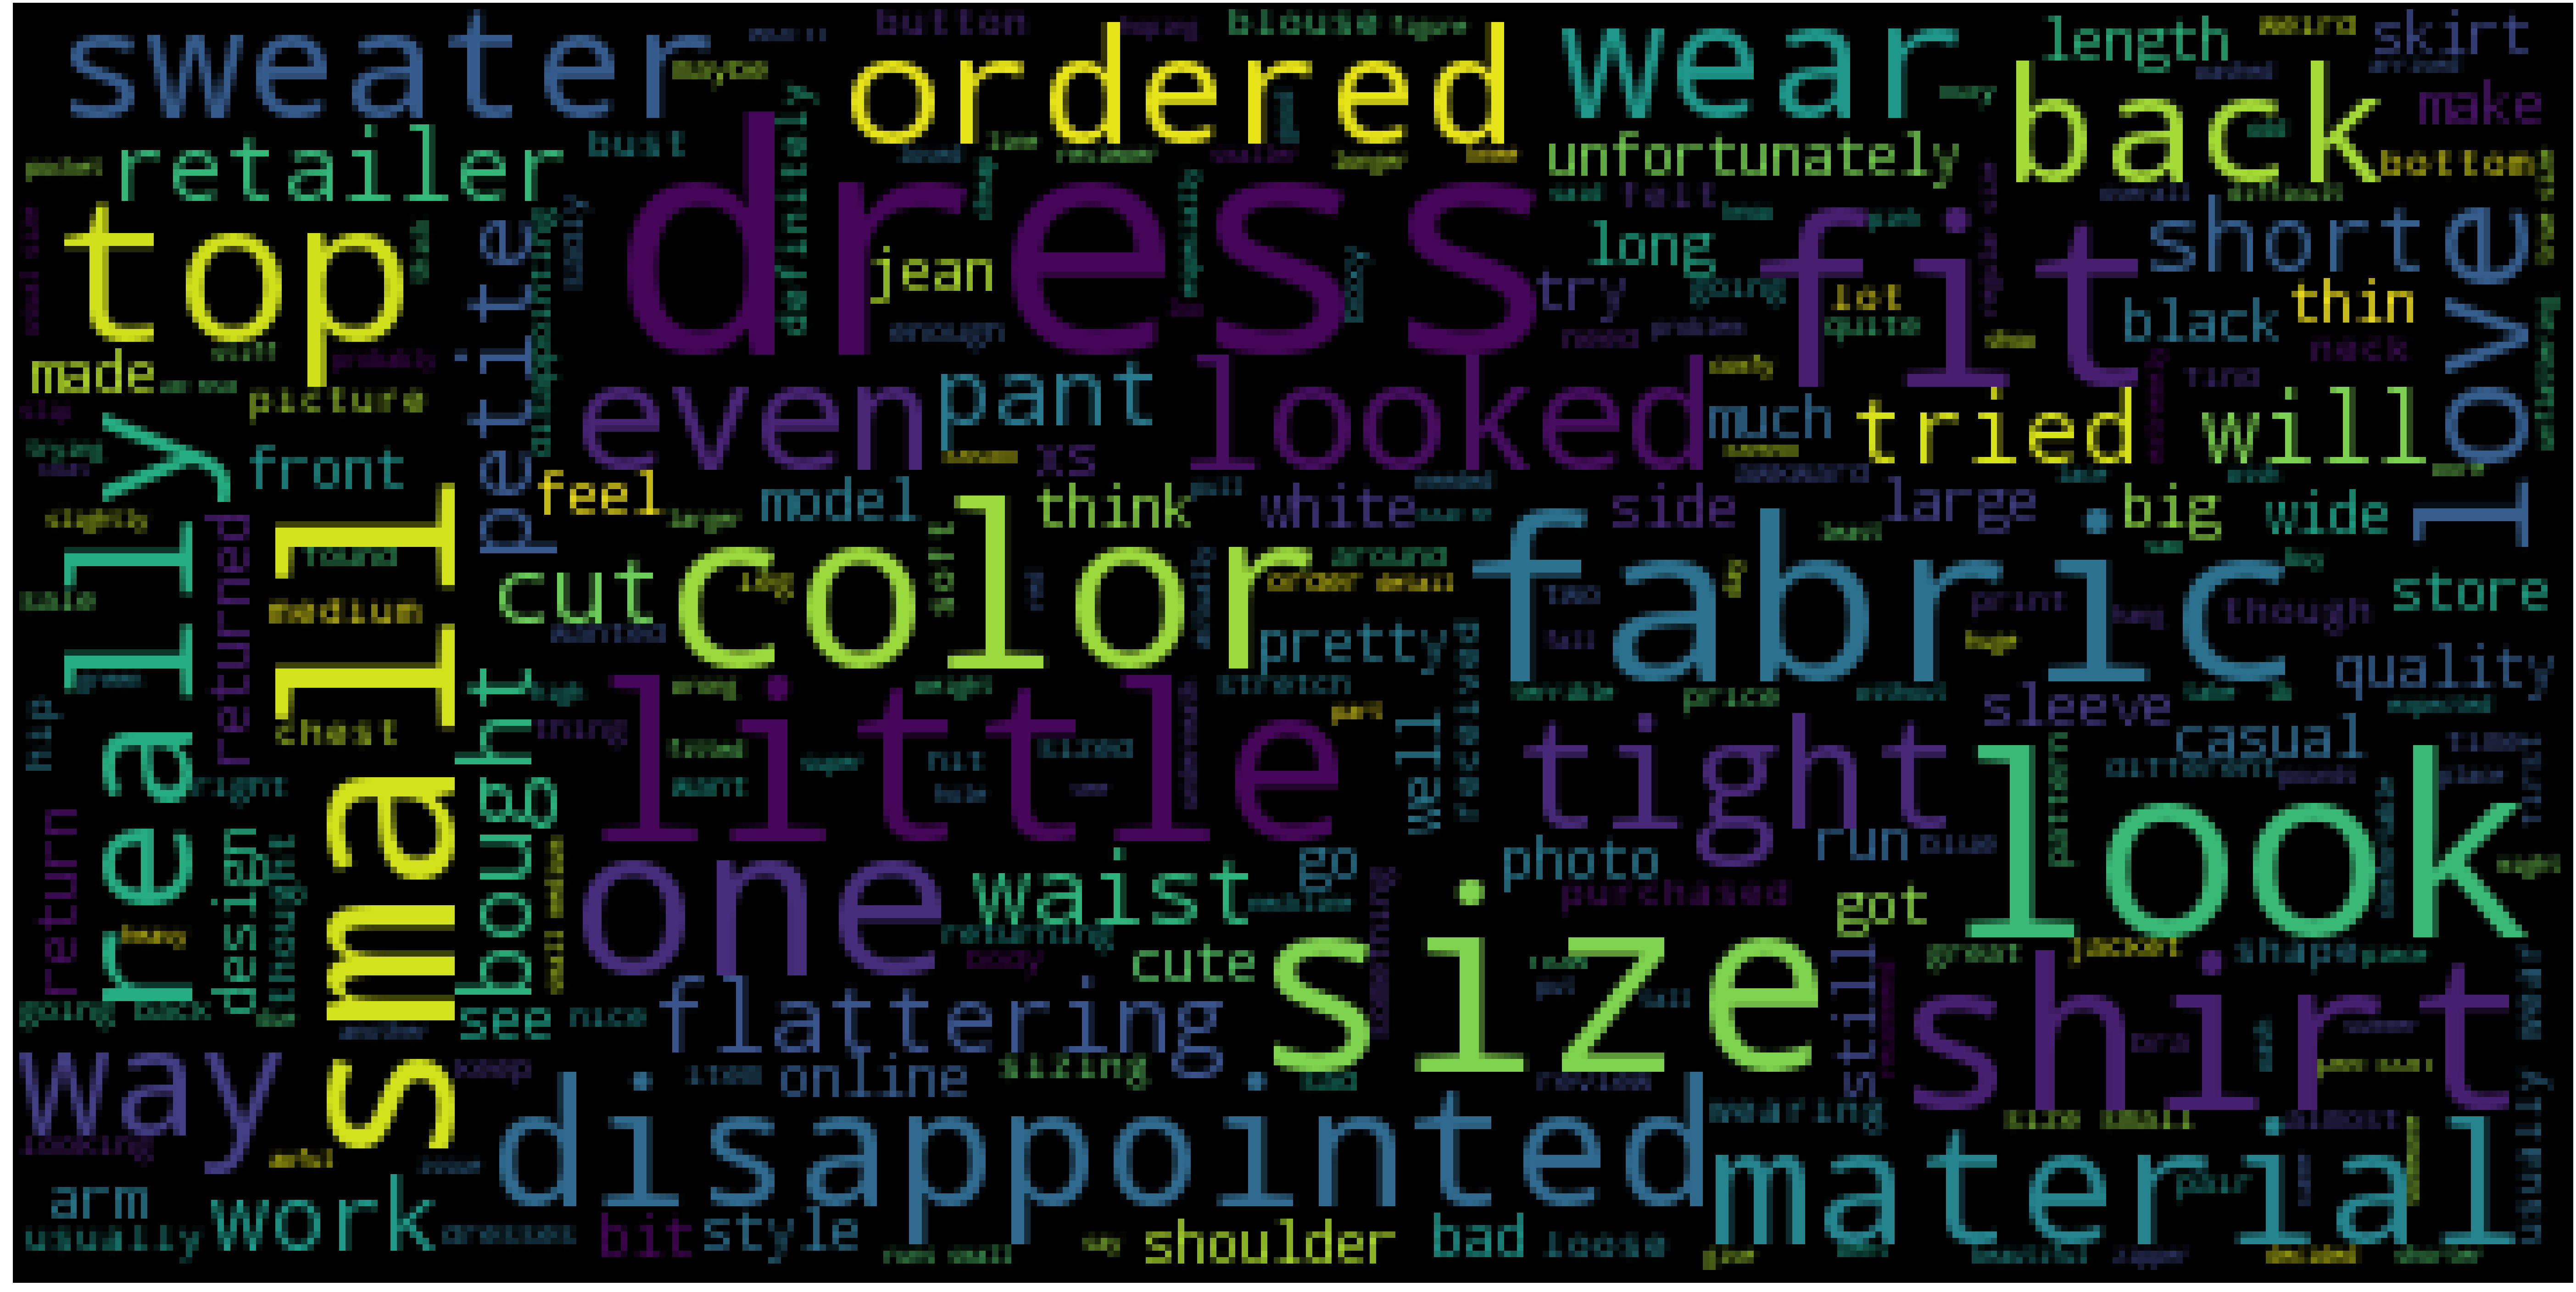

In [26]:
wc(negative_reviews['Review'],'black','Most Used Words')

*The above wordcloud only for the Negative reviews.*

In [27]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
df['Review Text'].head(5).apply(text_process)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

*This is how the above function works. Basically, the above function removes the punctuations, converts word into lower case, and removes the stopwords from the sentence.*

**Vectorization**

*At this moment, we have our review text column as a token (which has no punctuations and stopwords).
We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.*

In [29]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [54]:
rating_class

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,496
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,166
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,360
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,502
13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,1,0,Initmates,Intimate,Intimates,377
17,853,41,Looks great with white pants,Took a chance on this blouse and so glad i did...,5,1,0,General,Tops,Blouses,296
18,1120,32,Super cute and cozy,"A flattering, super cozy coat. will work well...",5,1,0,General,Jackets,Outerwear,167
19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,1,0,General,Dresses,Dresses,292


In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [32]:
tfidf_vectorizer = TfidfVectorizer(analyzer=text_process).fit(X_review)

In [33]:
import gensim
from gensim import models

word2vec_path = "./GoogleNews-vectors-negative300.bin.gz"
# word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [50]:
word2vec

In [58]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['Review Text'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [62]:
X_review = get_word2vec_embeddings(word2vec, rating_class)
# X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, y, 
#                                                                                         test_size=0.2, random_state=42)

In [34]:
print(len(bow_transformer.vocabulary_))

13953


In [35]:
print(len(tfidf_vectorizer.vocabulary_))

13953


*Now, the above number is the  size of the vocabulary stored in the vectoriser (based on X_review) *

In [36]:
X_review = tfidf_vectorizer.transform(X_review)


In [69]:
X_train[10:50]

[array([-1.39857405e-01,  9.41344180e-02, -1.02667340e-02,  9.75619041e-02,
        -3.70533054e-02,  1.19084762e-02, -7.46687550e-02, -3.50908700e-02,
        -1.93855932e-02,  1.14628161e-02, -3.98325904e-02, -7.03620523e-02,
        -1.57793465e-01,  1.86186451e-02, -9.21825344e-02,  7.20831402e-02,
         6.71977415e-02,  1.25148140e-01, -8.65757829e-03,  7.21590721e-03,
        -1.96234441e-01, -4.13301112e-02,  8.50515851e-02,  1.97455067e-02,
        -5.54642500e-02,  1.86277454e-02, -1.83006985e-01,  2.60777360e-02,
        -1.91542803e-02, -2.77597201e-02, -7.55661787e-03,  2.07709361e-02,
        -5.24368545e-02, -5.35491426e-02, -8.88535322e-02,  6.65457515e-02,
        -1.88632771e-01,  8.13257250e-02, -2.85589574e-02,  6.84531002e-02,
        -3.51442499e-02, -3.14821405e-02,  4.85140526e-02,  6.15062649e-02,
         4.01297101e-02, -3.60627643e-02, -2.09925765e-02, -1.27406647e-01,
        -1.01695743e-01,  5.01899331e-02, -1.16501837e-01,  1.75515592e-01,
        -3.1

**Training Data and Test Data**

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.8, random_state=42)

**Train our model **

*To predict the rating of the reviews,  we will use Naive Bayes Machine Learning Algorithm. Since this works well with the text data. *

In [110]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
nb = GaussianNB(priors=[.04,.96])#, alpha=0.25,
nb.fit(X_train, y_train)

GaussianNB(priors=[0.04, 0.96])

**Testing the model**

In [111]:
predict=nb.predict(X_test)

*Once we predicted the values, now the most important task is to check and evaluate our model against the actual ratings (stored in y_test) using confusion_matrix and classification_report from Scikit-learn.*

In [112]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))
print(nb.class_prior_)
print(nb.class_count_)

[[ 30  28]
 [338 759]]


             precision    recall  f1-score   support

          1       0.08      0.52      0.14        58
          5       0.96      0.69      0.81      1097

avg / total       0.92      0.68      0.77      1155

[0.04 0.96]
[ 633. 9762.]


*Woaah !! Our model achieved 95% efficiency. It means the business can predict the users liked the product or not*

**try logreg and gbdt**

In [122]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)

In [ ]:
logReg.fit(X_train, y_train)

In [ ]:
logRegPred = logReg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, logRegPred)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, logRegPred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
# import numpy as np
# import itertools
# from sklearn.metrics import confusion_matrix

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.1f' if normalize else 'd'
#     thresh = cm.max() / 2.

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

#     return plt

In [ ]:
# cmlr = confusion_matrix(y_test, logRegPred)
# fig = plt.figure(figsize=(10, 10))
# plot = plot_confusion_matrix(cm, classes=['1','5'], normalize=True, title='Confusion matrix')
# plt.show()
# print(cmlr)

print(confusion_matrix(y_test, logRegPred))

**Now let's test the model with the data**

In [42]:
rating_positive=df['Review Text'][3]
rating_positive

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

*First, I want to test with the positive review. I have chosen the above review and its rating is 5. After evaluating it should predict the rating as 5.*

In [43]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

5

*Second, I want to test with the negative review. I have chosen the below review and its rating is 1. After evaluating it should predict the rating as 1.*

In [44]:
rating_negative=df['Review Text'][61]
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [45]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1

**Now, I want to predict which product is recommended and which is not**

In [48]:
# X_predict_recommend=df['Review Text']
# y_recommend=df['Recommended IND']

# bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

# X_predict_recommend = bow_transformer.transform(X_predict_recommend)

# X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

# nb = MultinomialNB()
# nb.fit(X_train, y_train)
# 
# predict_recommendation=nb.predict(X_test)


# print(confusion_matrix(y_test, predict_recommendation))
# print('\n')
# print(classification_report(y_test, predict_recommendation))

*For the second prediction (Product Recommendation Vs Review Text), the model predicted 87% efficiency. Now lets test the data.*

In [ ]:
# rating_positive

In [ ]:
# rating_positive_transformed = bow_transformer.transform([rating_positive])
# nb.predict(rating_positive_transformed)[0]

*In the above block, our model predicted correclty. Since it was a positive review and it was recommended. Hence we got value 1.*

In [ ]:
# rating_negative

In [ ]:
# rating_negative_transformed = bow_transformer.transform([rating_negative])
# nb.predict(rating_negative_transformed)[0]

*For the above scenario, our model predicted correclty. Since it was a negative review and it was not recommended. Hence we got value 0.*

**Thank you so much for viewing this work. If you like this, please upvote and do comment.**